# Ising model


The Ising Hamiltonian can be written as, 

$$ 
\mathcal{H} = -J \sum_{\langle i j \rangle} S_{i} S_{j}  
$$

* The spins $S_{i}$ can take values $\pm 1$,
*  $\langle i j \rangle$ implies nearest-neighbor interaction only, 
* $J>0$ is the strength of exchange interaction,
 

The system undergoes a 2nd order phase transition at the critical temperature $T_{c}$.

In equilibrium, for temperature less than $T_{c}$, the system magnetises, and the state  is called the ferromagnetic or the ordered state. For temperature greater than $T_{c}$, the system is in the disordered or the paramagnetic state.
 
The order parameter $m$, distinguished the two phases. It is zero in the paramagnetic state while non-zero in the ferromagnetic state. It is defined as follows.

$$ m = \frac{\langle S \rangle}{N} $$

for this system is the average magnetization. $m$ is zero in the disordered state and non-zero in the ordered state, 



## Ising model in 2D
The following code simulates the Ising model in two dimensions to calculate the energy and magnetisation.

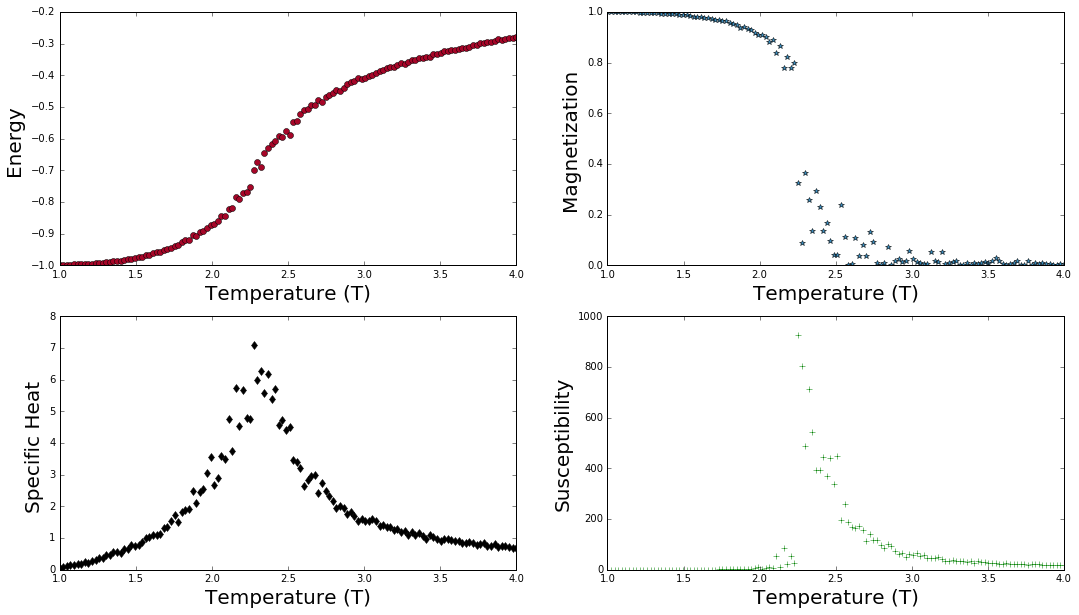

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

## monte carlo moves
def mcmove(config, beta):
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

## Energy calculation
def calcEnergy(config):
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.

## magnetization of  the configuration
def calcMag(config):
    mag = np.sum(config)
    return mag

##  MAIN PART OF THE CODE
nt    = 128
N     = 16

Energy = np.zeros(nt)
Magnetization = np.zeros(nt)
SpecificHeat = np.zeros(nt)
Susceptibility = np.zeros(nt)

T  = np.linspace(1, 4, nt)        #temperature

for m in range(len(T)):
    E1 = M1 = E2 = M2 = 0
    def initialstate(N):    # generates a random spin config
        state = 2*np.random.randint(2, size=(N,N))-1
        return state

## This is to equilibrate the system
    eqSteps = 2000
    config = initialstate(N)
    for i in range(eqSteps):
        mcmove(config, 1.0/T[m])

## This part does the main calculations and the measurements
    mcSteps = 2000
    for i in range(mcSteps):
        mcmove(config, 1.0/T[m])   # monte carlo moves
        Ene = calcEnergy(config)        # calculate the energy
        Mag = calcMag(config)           # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2   + Mag*Mag ;
        E2 = E2   + Ene*Ene;

        Energy[m]         = E1/(mcSteps*N*N)
        Magnetization[m]  = M1/(mcSteps*N*N)
        SpecificHeat[m]   = ( E2/mcSteps - E1*E1/(mcSteps*mcSteps) )/(N*T[m]*T[m]);
        Susceptibility[m] = ( M2/mcSteps - M1*M1/(mcSteps*mcSteps) )/(N*T[m]);

# plot the energy and Magnetization
f = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');    

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, Energy, 'o', color="#A60628", label=' Energy');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(Magnetization), '*', color="#348ABD", label='Magnetization');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);


sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, SpecificHeat, 'd', color="black", label='Specific Heat');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);


sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, Susceptibility, '+', color="green", label='Specific Heat');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);
plt.show()
#plt.legend(loc='best', fontsize=15); 

A better optimized version of the above code can be found [here](https://github.com/rajeshrinet/compPhy/tree/master/ising/pyImplementation). One of the difference being that we do not calculate the exponential in the loop in the optimized cython version. The way it is less expensive in terms of computation time, as we do not have to function call $N*N$ times. In doing so, we use the fact that spin can take values 1 and -1. Thus, there are only two possibilities for an energy increasing move. They are:

##Below we plot the snapshots of the configurations

**Note** that we have not done the equilibration. We start with a random configuration and then plot the configurations.

In [3]:
%matplotlib inline
# Simulating the Ising model
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model '''    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        N, temp     = 100, 2.26
        # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 5001
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            if i == 1:        self.configPlot(f, config, i, N, 2);
            if i == 10:       self.configPlot(f, config, i, N, 3);
            if i == 100:      self.configPlot(f, config, i, N, 4);
            if i == 100:     self.configPlot(f, config, i, N, 5);
            if i == 5000:    self.configPlot(f, config, i, N, 6);
                 
                    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i)     
    plt.show()

In [4]:
rm = Ising()

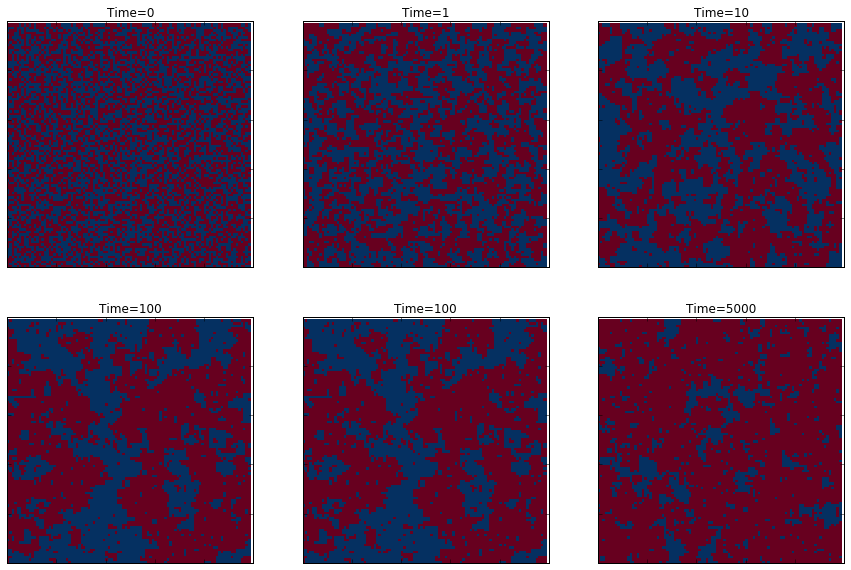

In [5]:
rm.simulate()

##Kinetic Ising Models


* Ising model has no Hamiltonian given dynamics. For kinetics we assume that an associated heat bath generates
    spin flip $( S_{i} \rightarrow - S_{i})$. 
* The kinetics can be 
    * The spin system, which have a non-conserved kinetics. At the microscopic level, spin-flip Glauber model is used to describe the non-conserved kinetics of the paramagnetic to ferromagnetic transition
    * The binary (AB) mixture or Lattice Gas. The spin-exchange Kawasaki model is used to describe the conserved kinetics of binary mixtures at the microscopic level


* Purely dissipative and stochastic models are ofter referred to as Kinetic Ising models. 
* At the coarse-grained level the respective order parameters, $\phi(\vec{r},t)$ are used to describe the dynamics. 
  

###Domain Growth with non-conserved kinetics

* At $t = 0,$ a paramagnetic phase is quenched below the critical temperature $T_{c}$.
* The paramagnetic state is no longer the preferred equilibrium state.
* The far-from-equilibrium, homogeneous, state evolves towards its new equilibrium state by separating in domains.
* These domains coarsen with time and are characterized by length scale $L(t)$.
* A finite system becomes ordered in either of two equivalent states as $t \rightarrow \infty$. 
* The simplest kinetics Ising model for non-conserved scalar field $\phi(\vec{r})$ is the time dependent Ginzburg-Landau (TDGL) model. 


###TDGL equation

The equation of motion for $\phi$ can be written as:

$$ \frac{\partial \phi}{\partial t} = -\Gamma \frac{\delta \mathcal{F}}{\delta \phi} +\theta(\vec{r},t)$$

where $\frac{\delta \mathcal{F}}{\delta \phi}$ denotes functional derivative of free-energy functional


$$ \mathcal{F(\phi)} = \int  \left[ a\phi^2 + b \phi^4 + \frac{1}{2}K(\nabla\phi)^{2}\right]$$


For  $ T < T_{c} $ we can write TDGL in terms of rescaled variables as

$$ \frac{\partial \phi}{\partial t} = \phi-\phi^{3}+ \nabla^{2}\phi $$


In the next section we will simulate the TDGL equation.

In [6]:
# Simulating the TDGL equation
# This example uses the 5-point Laplacian discretization from 
# [here](https://github.com/ketch/finite-difference-course)
#
%matplotlib inline
import numpy as np
from __future__ import division
from scipy.sparse import spdiags,linalg,eye
import matplotlib.pyplot as plt


a, b, k  = 0, 1.0, 100.0
dh, dt = 1.0, 1e-3
N, T  = 256, 10001

class TDGL():
    '''
    Class to solve a PDE 
    '''
    def mu(self, u):
        return a*u + b*u*u*u 

    def laplacian(self, N):
        '''Construct a sparse matrix that applies the 5-point Laplacian discretization'''
        e=np.ones(N**2)
        e2=([1]*(N-1)+[0])*N
        e3=([0]+[1]*(N-1))*N
        h=dh
        A=spdiags([-4*e,e2,e3,e,e],[0,-1,1,-N,N],N**2,N**2)
        A/=h**2
        return A

    def integrate(self, L, x, y, u):
        '''  simulates the equation and plots it at different instants '''
        
        f = plt.figure(figsize=(15, 15), dpi=80);    

        for i in range(T):          
            u = u - dt*(self.mu(u) - k*L.dot(u))
            
            if (i==0):      self.configPlot(x, y, u, f, 1, i);
            if (i==1):      self.configPlot(x, y, u, f, 2, i);
            if (i==10):     self.configPlot(x, y, u, f, 3, i);
            if (i==100):    self.configPlot(x, y, u, f, 4, i);
            if (i==1000):   self.configPlot(x, y, u, f, 5, i);
            if (i==10000):  self.configPlot(x, y, u, f, 6, i);
     
    def configPlot(self, x, y, u,f, n_, i):
        U= u.reshape((N,N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)
        plt.pcolormesh(x,y,U, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i)
    plt.show()

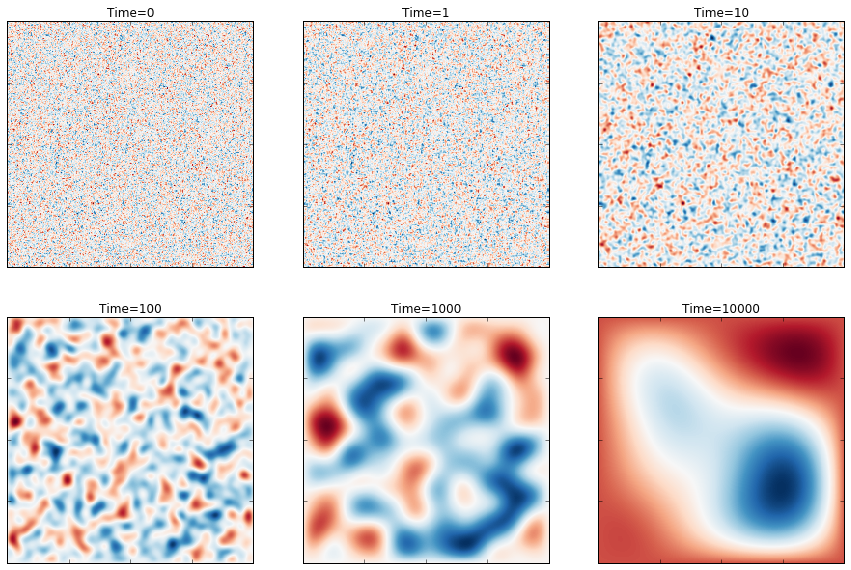

In [7]:
rm = TDGL()   # instantiate the class

# generate the grid and initialise the field
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X, Y = np.meshgrid(x, y)

u=np.random.randn(N*N, 1);  # Initial data
L = rm.laplacian(N)         # construct the laplacian
rm.integrate(L, x, y, u)    # simulate

#simulation completed!!

 Thus we see that time evolution of the Monte carlo simulation of the Ising model and that of the TDGL equation are similar. The TDGL equation is a hydrodynamic model while the simulation of the Ising model was done at the molecular level. We still see a similarity in the time evolution, as expected!